# I put all plotting stuff here!

In [1]:
import torch
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
PLOTS_DIR = "/users/PAS2099/justinhylee135/Research/UnlearningDM/CUIG/Analysis/Notebooks/notebook_output"

In [2]:
def add_trendline(ax, x, y):
    if len(x) >= 2:
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        xs = np.linspace(min(x), max(x), 100)
        ax.plot(xs, p(xs), linestyle="--")

In [5]:
def make_three_plots(df_corr, out_dir=PLOTS_DIR, show=False):
    os.makedirs(out_dir, exist_ok=True)

    # 1) IRA vs Text Cosine
    fig1, ax1 = plt.subplots(figsize=(8,6))
    ax1.scatter(df_corr["cosine_similarity"], df_corr["ira_percent"], s=64)
    add_trendline(ax1, df_corr["cosine_similarity"].values, df_corr["ira_percent"].values)
    r1 = df_corr["ira_percent"].corr(df_corr["cosine_similarity"])
    ax1.set_xlabel("Text Embedding Cosine Similarity")
    ax1.set_ylabel("IRA (%)")
    ax1.set_title(f"IRA vs Text Cosine Similarity (r = {r1:.3f})")
    for _, row in df_corr.iterrows():
        ax1.annotate(row["style"], (row["cosine_similarity"], row["ira_percent"]), xytext=(4,4),
                     textcoords="offset points", fontsize=8)
    fig1.tight_layout(); fig1.savefig(os.path.join(out_dir, "plot_ira_vs_cosine.png"), dpi=200)
    if show:
        plt.show()
    plt.close(fig1)

    # 2) Cosine vs KV Update Norm
    fig2, ax2 = plt.subplots(figsize=(8,6))
    ax2.scatter(df_corr["cosine_similarity"], df_corr["kv_l2_norm"], s=64)
    add_trendline(ax2, df_corr["cosine_similarity"].values, df_corr["kv_l2_norm"].values)
    r2 = df_corr["cosine_similarity"].corr(df_corr["kv_l2_norm"])
    ax2.set_xlabel("Text Embedding Cosine Similarity")
    ax2.set_ylabel("KV Update Norm")
    ax2.set_title(f"Cosine Similarity vs KV Update Norm (r = {r2:.3f})")
    for _, row in df_corr.iterrows():
        ax2.annotate(row["style"], (row["cosine_similarity"], row["kv_l2_norm"]), xytext=(4,4),
                     textcoords="offset points", fontsize=8)
    fig2.tight_layout(); fig2.savefig(os.path.join(out_dir, "plot_cosine_vs_kvnorm.png"), dpi=200)
    if show:
        plt.show()
    plt.close(fig2)

    # 3) IRA vs KV Update Norm
    fig3, ax3 = plt.subplots(figsize=(8,6))
    ax3.scatter(df_corr["ira_percent"], df_corr["kv_l2_norm"], s=64)
    add_trendline(ax3, df_corr["ira_percent"].values, df_corr["kv_l2_norm"].values)
    r3 = df_corr["ira_percent"].corr(df_corr["kv_l2_norm"])
    ax3.set_xlabel("IRA (%)")
    ax3.set_ylabel("KV Update Norm")
    ax3.set_title(f"IRA vs KV Update Norm (r = {r3:.3f})")
    for _, row in df_corr.iterrows():
        ax3.annotate(row["style"], (row["ira_percent"], row["kv_l2_norm"]), xytext=(4,4),
                     textcoords="offset points", fontsize=8)
    fig3.tight_layout(); fig3.savefig(os.path.join(out_dir, "plot_ira_vs_kvnorm.png"), dpi=200)
    if show:
        plt.show()
    plt.close(fig3)

    print(f"[plots] saved to: {out_dir}")
    print(f"  r(IRA, Cosine)    = {r1:.4f}")
    print(f"  r(Cosine, KVnorm) = {r2:.4f}")
    print(f"  r(IRA, KVnorm)    = {r3:.4f}")


/tmp/slurmtmp.2535602/ipykernel_3974844/152392330.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  df_corr_test = torch.load(f"{PLOTS_DIR}/kv_correlation_df.pt")


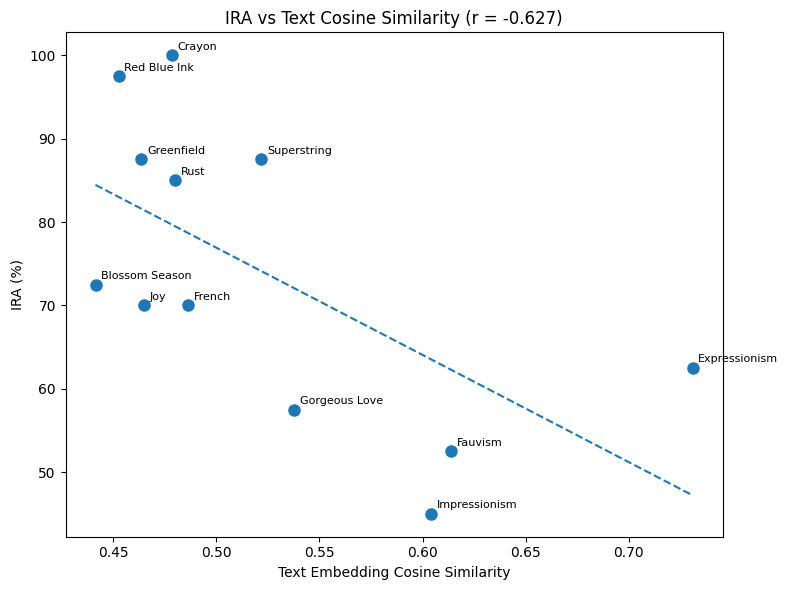

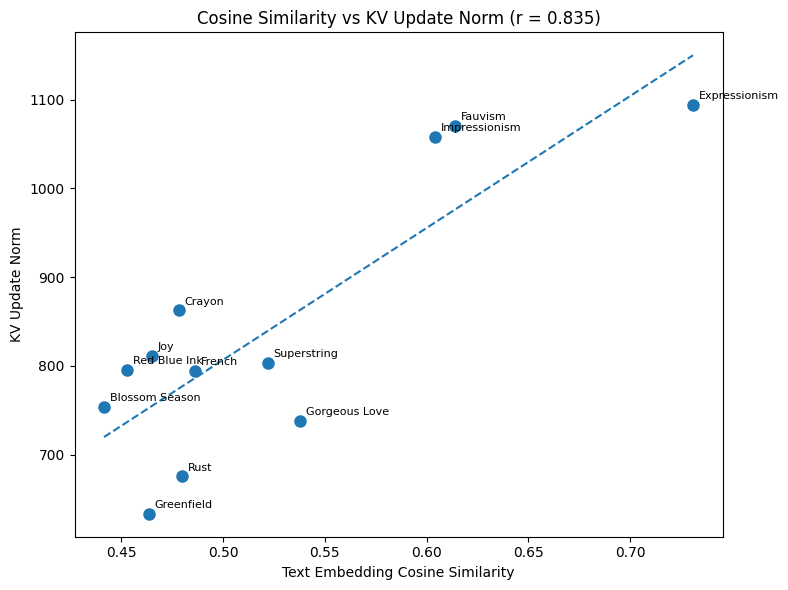

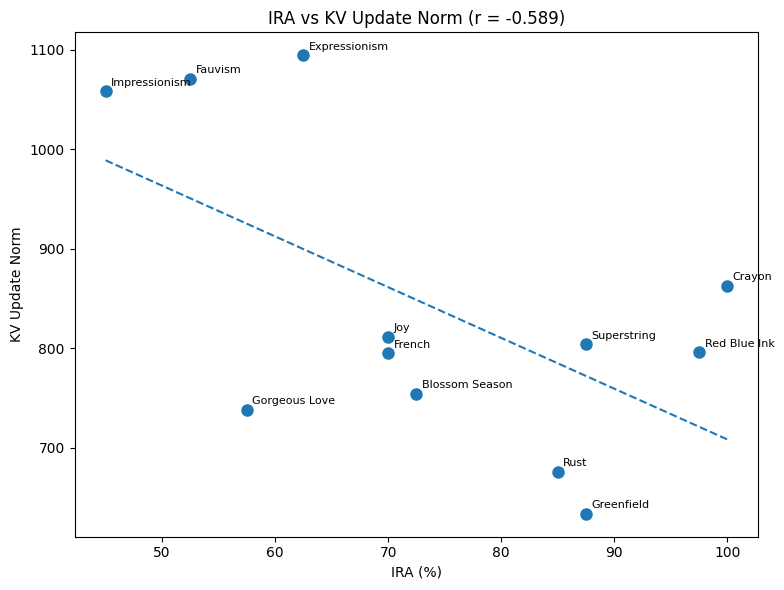

[plots] saved to: /users/PAS2099/justinhylee135/Research/UnlearningDM/CUIG/Analysis/Notebooks/notebook_output
  r(IRA, Cosine)    = -0.6265
  r(Cosine, KVnorm) = 0.8352
  r(IRA, KVnorm)    = -0.5887


In [6]:
df_corr_test = torch.load(f"PATH TO: kv_correlation_df.pt")
make_three_plots(df_corr_test, PLOTS_DIR, show=True)

# New (Jinsu No Need to Run This!)

Loading base pipeline…


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

An error occurred while trying to fetch /users/PAS2099/justinhylee135/Research/UnlearningDM/CUIG/UnlearningMethods/base_models/UnlearnCanvas/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /users/PAS2099/justinhylee135/Research/UnlearningDM/CUIG/UnlearningMethods/base_models/UnlearnCanvas/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


Loading unlearned pipeline…


You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Computing KV diffs per style…
[KV] Blossom Season     layers=16 total=7.539e+02 avg=4.712e+01
[KV] Rust               layers=16 total=6.757e+02 avg=4.223e+01
[KV] Crayon             layers=16 total=8.625e+02 avg=5.391e+01
[KV] Fauvism            layers=16 total=1.071e+03 avg=6.691e+01
[KV] Superstring        layers=16 total=8.037e+02 avg=5.023e+01
[KV] Red Blue Ink       layers=16 total=7.959e+02 avg=4.974e+01
[KV] Gorgeous Love      layers=16 total=7.380e+02 avg=4.612e+01
[KV] French             layers=16 total=7.947e+02 avg=4.967e+01
[KV] Joy                layers=16 total=8.115e+02 avg=5.072e+01
[KV] Greenfield         layers=16 total=6.334e+02 avg=3.959e+01
[KV] Expressionism      layers=16 total=1.094e+03 avg=6.840e+01
[KV] Impressionism      layers=16 total=1.058e+03 avg=6.612e+01
[save] kv_analysis_results.pt


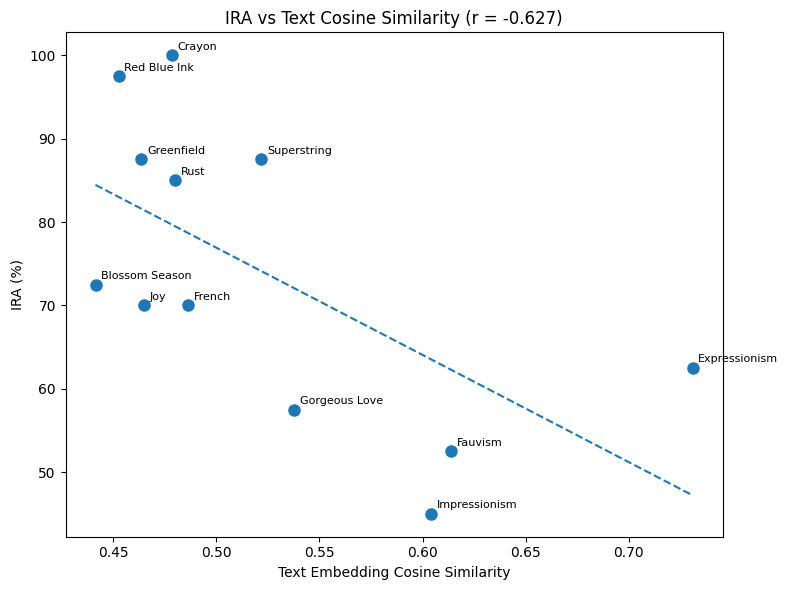

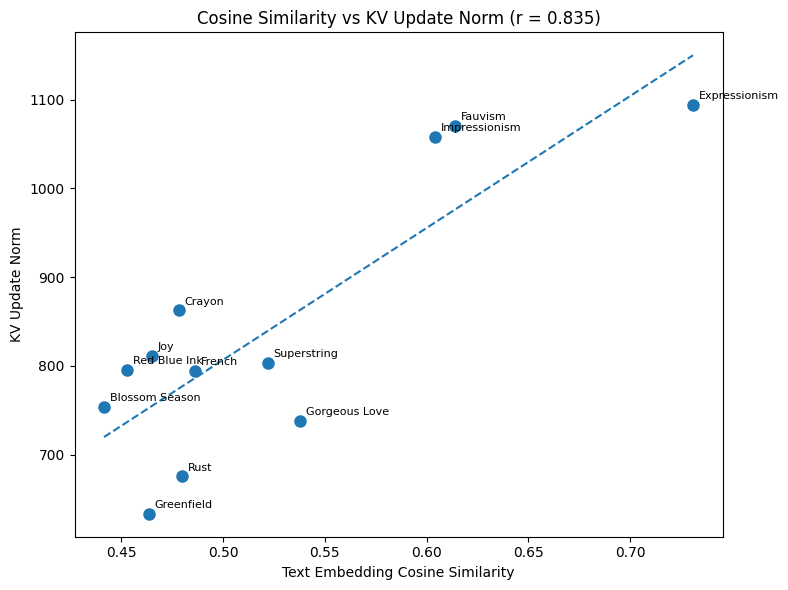

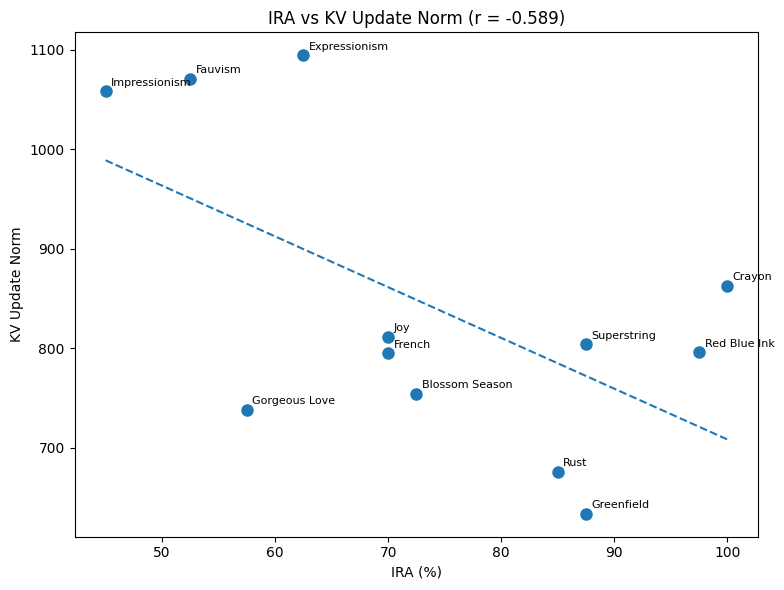

[plots] saved to: /users/PAS2099/justinhylee135/Research/UnlearningDM/CUIG/Analysis/Notebooks/notebook_output
  r(IRA, Cosine)    = -0.6265
  r(Cosine, KVnorm) = 0.8352
  r(IRA, KVnorm)    = -0.5887


In [28]:
# === kv_kvnorm_full_pipeline.py ===
# End-to-end KV capture, KV-diff computation, and three-plot generation.

import os
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from diffusers import StableDiffusionPipeline, UNet2DConditionModel

# -------------------------------
# Config: EDIT THESE AS NEEDED
# -------------------------------
BASE_MODEL_ID   = "/users/PAS2099/justinhylee135/Research/UnlearningDM/CUIG/UnlearningMethods/base_models/UnlearnCanvas"
CHECKPOINT_PATH = "/fs/scratch/PAS2099/lee.10369/CUIG/ca/models/independent/base/style/no_retention/Abstractionism/delta.bin"
TARGET_STYLE    = "Abstractionism"  # affects default similarity CSV name
COMPARISON_STYLES = [
    "Blossom_Season","Rust","Crayon","Fauvism","Superstring","Red_Blue_Ink",
    "Gorgeous_Love","French","Joy","Greenfield","Expressionism","Impressionism"
]
# If your CSV uses the exact target lowercased in the filename:
SIMILARITY_CSV = f"text_embedding_similarity_to_{TARGET_STYLE.lower()}.csv"  # e.g., "text_embedding_similarity_to_abstractionism.csv"

# IRA data
IRA_DATA = {
    "Blossom_Season": 72.50, "Rust": 85.00, "Crayon": 100.00, "Fauvism": 52.50,
    "Superstring": 87.50, "Red_Blue_Ink": 97.50, "Gorgeous_Love": 57.50,
    "French": 70.00, "Joy": 70.00, "Greenfield": 87.50, "Expressionism": 62.50,
    "Impressionism": 45.00
}

# Inference / compute settings
DEVICE = 'cuda:0' if torch.cuda.is_available() else 'cpu'
DTYPE  = torch.float16 if DEVICE.startswith('cuda') else torch.float32
GUIDANCE = 7.5
STEPS    = 2
H, W     = 512, 512
SEED     = 12345

# Output paths
RESULTS_PATH = "kv_analysis_results.pt"
PLOTS_DIR    = "/users/PAS2099/justinhylee135/Research/UnlearningDM/CUIG/Analysis/Notebooks/notebook_output"

# -------------------------------
# Utilities
# -------------------------------
def format_style_name(s): 
    return s.replace('_',' ').title()

def prompt_for_style(s):   
    return f"An image in the style of {format_style_name(s)}"

# -------------------------------
# Loaders
# -------------------------------
def load_base_pipe():
    pipe = StableDiffusionPipeline.from_pretrained(
        BASE_MODEL_ID, torch_dtype=DTYPE, safety_checker=None, requires_safety_checker=False
    ).to(DEVICE)
    pipe.set_progress_bar_config(disable=True)
    return pipe

def load_unlearned_pipe(base_pipe, checkpoint_path):
    unet = UNet2DConditionModel.from_pretrained(BASE_MODEL_ID, subfolder="unet", torch_dtype=DTYPE)
    ckpt = torch.load(checkpoint_path, map_location="cpu")
    sd = ckpt.get('unet', ckpt.get('state_dict', ckpt.get('model', ckpt)))
    sd = { (k[5:] if k.startswith('unet.') else k): v for k,v in sd.items() }
    unet.load_state_dict(sd, strict=False)
    unet = unet.to(DEVICE)

    pipe = StableDiffusionPipeline(
        vae=base_pipe.vae, text_encoder=base_pipe.text_encoder, tokenizer=base_pipe.tokenizer,
        unet=unet, scheduler=base_pipe.scheduler, safety_checker=None, feature_extractor=base_pipe.feature_extractor
    ).to(DEVICE)
    pipe.set_progress_bar_config(disable=True)
    return pipe

# -------------------------------
# KV capture via processor wrap
# -------------------------------
class KVCaptureProcessor:
    """Wraps an attention processor to capture cross-attn K,V in float32."""
    def __init__(self, layer_name, original_processor, store_dict):
        self.layer_name = layer_name
        self.orig = original_processor
        self.store = store_dict

    def __call__(self, attn, hidden_states, encoder_hidden_states=None, attention_mask=None, **kwargs):
        if encoder_hidden_states is not None:
            with torch.no_grad():
                K = attn.to_k(encoder_hidden_states).to(torch.float32)
                V = attn.to_v(encoder_hidden_states).to(torch.float32)
                self.store[self.layer_name] = {'K': K.detach().cpu(), 'V': V.detach().cpu()}
        return self.orig(attn, hidden_states, encoder_hidden_states, attention_mask, **kwargs)

def _iter_attn2_modules(unet):
    for name, module in unet.named_modules():
        if 'attn2' in name and hasattr(module, 'processor') and hasattr(module, 'to_k') and hasattr(module, 'to_v'):
            yield name, module

def capture_kv_for_prompt(pipe, prompt, num_steps=STEPS, guidance=GUIDANCE, seed=SEED):
    kv_store, original, replaced = {}, {}, []
    for name, attn in _iter_attn2_modules(pipe.unet):
        original[name] = attn.processor
        attn.processor = KVCaptureProcessor(name, attn.processor, kv_store)
        replaced.append((name, attn))

    gen = torch.Generator(device=DEVICE).manual_seed(seed)
    try:
        with torch.inference_mode():
            _ = pipe(prompt, num_inference_steps=num_steps, guidance_scale=guidance,
                     height=H, width=W, generator=gen, output_type="np")
    finally:
        for name, attn in replaced:
            attn.processor = original[name]
    return kv_store  # dict[layer] -> {'K': cpu fp32, 'V': cpu fp32}

# -------------------------------
# KV difference computation
# -------------------------------
def kv_l2_diff(base_kv, unlearned_kv):
    per_layer, total, count = {}, 0.0, 0
    for layer in base_kv.keys():
        if layer in unlearned_kv:
            Kb, Vb = base_kv[layer]['K'].to(torch.float32), base_kv[layer]['V'].to(torch.float32)
            Ku, Vu = unlearned_kv[layer]['K'].to(torch.float32), unlearned_kv[layer]['V'].to(torch.float32)
            k_diff = torch.norm(Kb - Ku).item()
            v_diff = torch.norm(Vb - Vu).item()
            per_layer[layer] = {'key_l2_diff': k_diff, 'value_l2_diff': v_diff, 'total_l2_diff': k_diff + v_diff}
            total += (k_diff + v_diff); count += 1
    avg = total / max(count, 1)
    return per_layer, total, count, avg

def analyze_styles(base_pipe, unlearned_pipe, styles):
    results = {}
    for s in styles:
        prompt = prompt_for_style(s)
        base_kv  = capture_kv_for_prompt(base_pipe, prompt)
        unl_kv   = capture_kv_for_prompt(unlearned_pipe, prompt)
        layer_diffs, total, cnt, avg = kv_l2_diff(base_kv, unl_kv)
        results[s] = {'total_l2_norm': total, 'avg_l2_norm': avg, 'layer_count': cnt, 'layer_details': layer_diffs}
        print(f"[KV] {format_style_name(s):<18} layers={cnt:<2d} total={total:.3e} avg={avg:.3e}")
    return results

# -------------------------------
# Correlation + plots
# -------------------------------
def build_corr_df(kv_diffs, styles, sim_df, ira_dict):
    rows = []
    for raw in styles:
        if raw not in kv_diffs: 
            continue
        pretty = format_style_name(raw)
        match = sim_df[sim_df["style"] == pretty]
        if match.empty:
            continue
        cos_sim = float(match["cosine_similarity"].iloc[0])
        ira = ira_dict.get(raw)
        if ira is None:
            continue
        rows.append({
            "style": pretty,
            "raw_style": raw,
            "cosine_similarity": cos_sim,
            "ira_percent": float(ira),
            "kv_l2_norm": float(kv_diffs[raw]["total_l2_norm"])
        })
    return pd.DataFrame(rows)

def add_trendline(ax, x, y):
    if len(x) >= 2:
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        xs = np.linspace(min(x), max(x), 100)
        ax.plot(xs, p(xs), linestyle="--")

def make_three_plots(df_corr, out_dir=PLOTS_DIR, show=False):
    os.makedirs(out_dir, exist_ok=True)

    # 1) IRA vs Text Cosine
    fig1, ax1 = plt.subplots(figsize=(8,6))
    ax1.scatter(df_corr["cosine_similarity"], df_corr["ira_percent"], s=64)
    add_trendline(ax1, df_corr["cosine_similarity"].values, df_corr["ira_percent"].values)
    r1 = df_corr["ira_percent"].corr(df_corr["cosine_similarity"])
    ax1.set_xlabel("Text Embedding Cosine Similarity")
    ax1.set_ylabel("IRA (%)")
    ax1.set_title(f"IRA vs Text Cosine Similarity (r = {r1:.3f})")
    for _, row in df_corr.iterrows():
        ax1.annotate(row["style"], (row["cosine_similarity"], row["ira_percent"]), xytext=(4,4),
                     textcoords="offset points", fontsize=8)
    fig1.tight_layout(); fig1.savefig(os.path.join(out_dir, "plot_ira_vs_cosine.png"), dpi=200)
    if show:
        plt.show()
    plt.close(fig1)

    # 2) Cosine vs KV Update Norm
    fig2, ax2 = plt.subplots(figsize=(8,6))
    ax2.scatter(df_corr["cosine_similarity"], df_corr["kv_l2_norm"], s=64)
    add_trendline(ax2, df_corr["cosine_similarity"].values, df_corr["kv_l2_norm"].values)
    r2 = df_corr["cosine_similarity"].corr(df_corr["kv_l2_norm"])
    ax2.set_xlabel("Text Embedding Cosine Similarity")
    ax2.set_ylabel("KV Update Norm")
    ax2.set_title(f"Cosine Similarity vs KV Update Norm (r = {r2:.3f})")
    for _, row in df_corr.iterrows():
        ax2.annotate(row["style"], (row["cosine_similarity"], row["kv_l2_norm"]), xytext=(4,4),
                     textcoords="offset points", fontsize=8)
    fig2.tight_layout(); fig2.savefig(os.path.join(out_dir, "plot_cosine_vs_kvnorm.png"), dpi=200)
    if show:
        plt.show()
    plt.close(fig2)

    # 3) IRA vs KV Update Norm
    fig3, ax3 = plt.subplots(figsize=(8,6))
    ax3.scatter(df_corr["ira_percent"], df_corr["kv_l2_norm"], s=64)
    add_trendline(ax3, df_corr["ira_percent"].values, df_corr["kv_l2_norm"].values)
    r3 = df_corr["ira_percent"].corr(df_corr["kv_l2_norm"])
    ax3.set_xlabel("IRA (%)")
    ax3.set_ylabel("KV Update Norm")
    ax3.set_title(f"IRA vs KV Update Norm (r = {r3:.3f})")
    for _, row in df_corr.iterrows():
        ax3.annotate(row["style"], (row["ira_percent"], row["kv_l2_norm"]), xytext=(4,4),
                     textcoords="offset points", fontsize=8)
    fig3.tight_layout(); fig3.savefig(os.path.join(out_dir, "plot_ira_vs_kvnorm.png"), dpi=200)
    if show:
        plt.show()
    plt.close(fig3)

    print(f"[plots] saved to: {out_dir}")
    print(f"  r(IRA, Cosine)    = {r1:.4f}")
    print(f"  r(Cosine, KVnorm) = {r2:.4f}")
    print(f"  r(IRA, KVnorm)    = {r3:.4f}")

# -------------------------------
# Main pipeline
# -------------------------------
def run_full_pipeline():
    assert os.path.exists(CHECKPOINT_PATH), f"Checkpoint not found: {CHECKPOINT_PATH}"
    assert os.path.exists(SIMILARITY_CSV), f"Similarity CSV not found: {SIMILARITY_CSV}"

    print("Loading base pipeline…")
    base_pipe = load_base_pipe()
    print("Loading unlearned pipeline…")
    unlearned_pipe = load_unlearned_pipe(base_pipe, CHECKPOINT_PATH)

    print("Computing KV diffs per style…")
    kv_diffs = analyze_styles(base_pipe, unlearned_pipe, COMPARISON_STYLES)

    torch.save({
        'kv_l2_differences': kv_diffs,
        'base_checkpoint': BASE_MODEL_ID,
        'unlearned_checkpoint': CHECKPOINT_PATH,
        'target_style': TARGET_STYLE,
        'comparison_styles': COMPARISON_STYLES
    }, RESULTS_PATH)
    print(f"[save] {RESULTS_PATH}")

    # Correlation + plots
    sim_df = pd.read_csv(SIMILARITY_CSV)
    df_corr = build_corr_df(kv_diffs, COMPARISON_STYLES, sim_df, IRA_DATA)
    torch.save(df_corr, f"{PLOTS_DIR}/kv_correlation_df.pt")
    print(f"Saved correlation DataFrame with {len(df_corr)} entries.")
    if df_corr.empty:
        raise RuntimeError("No overlap between styles, similarities, and KV diffs.")
    make_three_plots(df_corr, PLOTS_DIR, show=True)

if __name__ == "__main__":
    run_full_pipeline()

# Old

In [ ]:
# Text Embedding Similarity Analysis
# This notebook analyzes similarity between text embeddings for art styles

import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pathlib import Path
import json
import os
from torch.nn.functional import cosine_similarity
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Import the necessary modules from your codebase
from omegaconf import OmegaConf
import sys
sys.path.append('/users/PAS2099/justinhylee135/Research/UnlearningDM/MMUC/machine_unlearning/mu_erasing_concept_esd')
from stable_diffusion.ldm.models.diffusion.ddim import DDIMSampler
from stable_diffusion.ldm.util import instantiate_from_config

print("Environment setup complete!")

# Configuration
CONFIG_PATH = '/users/PAS2099/justinhylee135/Research/UnlearningDM/MMUC/machine_unlearning/mu_erasing_concept_esd/configs/train_esd.yaml'  # Update this path
CKPT_PATH = '/users/PAS2099/justinhylee135/Research/UnlearningDM/MMDU/external_model_ckpts/UnlearnCanvas/unlearncanvas_compvis.ckpt'  # Update this path
DEVICE = 'cuda:0' if torch.cuda.is_available() else 'cpu'

# Art styles to analyze
TARGET_STYLE = "Abstractionism"
COMPARISON_STYLES = [
    "Blossom_Season",
    "Rust", 
    "Crayon",
    "Fauvism",
    "Superstring",
    "Red_Blue_Ink",
    "Gorgeous_Love",
    "French",
    "Joy",
    "Greenfield",
    "Expressionism",
    "Impressionism"
]

print(f"Target style: {TARGET_STYLE}")
print(f"Comparison styles: {len(COMPARISON_STYLES)} styles")
print(f"Device: {DEVICE}")

print("\n" + "="*70)
print("📋 TEXT EMBEDDING SIMILARITY ANALYSIS")
print("="*70)
print("🎯 Objective: Find styles with most similar text embeddings")
print("📊 Method: Cosine similarity between CLIP text embeddings")
print("🔤 Format: Each style as '{style} Style'")
print("="*70)

def load_model_from_config(config, ckpt, device="cpu", verbose=False):
    """Loads a model from config and a ckpt"""
    if isinstance(config, (str, Path)):
        config = OmegaConf.load(config)

    pl_sd = torch.load(ckpt, map_location="cpu")
    print(f"Loaded model from {ckpt}")
    global_step = pl_sd.get("global_step", 0)
    sd = pl_sd["state_dict"]
    model = instantiate_from_config(config.model)
    m, u = model.load_state_dict(sd, strict=False)
    model.to(device)
    model.eval()
    model.cond_stage_model.device = device
    return model

def format_style_name(style_name):
    """Convert style name to readable format"""
    return style_name.replace('_', ' ').title()

def format_prompt(style_name):
    """Format style name into a proper prompt"""
    formatted_name = format_style_name(style_name)
    return f"{formatted_name} Style"

def get_text_embedding(model, text, device):
    """Get text embedding from the model's text encoder"""
    with torch.no_grad():
        # Get the text embedding using the model's conditioning method
        text_embedding = model.get_learned_conditioning([text])
        return text_embedding.squeeze(0)  # Remove batch dimension

def calculate_embedding_similarity(emb1, emb2, similarity_type='cosine'):
    """Calculate similarity between two text embeddings"""
    
    # Ensure same device
    emb1 = emb1.to(DEVICE)
    emb2 = emb2.to(DEVICE)
    
    # Flatten embeddings if needed
    if emb1.dim() > 1:
        emb1 = emb1.flatten()
    if emb2.dim() > 1:
        emb2 = emb2.flatten()
    
    if similarity_type == 'cosine':
        # Cosine similarity
        similarity = cosine_similarity(emb1.unsqueeze(0), emb2.unsqueeze(0))
        return float(similarity.cpu())
    
    elif similarity_type == 'l2_distance':
        # L2 distance (lower = more similar)
        distance = torch.norm(emb1 - emb2).item()
        return -distance  # Negative so higher = more similar
    
    elif similarity_type == 'dot_product':
        # Dot product similarity
        dot_prod = torch.dot(emb1, emb2).item()
        return dot_prod
    
    elif similarity_type == 'pearson':
        # Pearson correlation
        emb1_centered = emb1 - emb1.mean()
        emb2_centered = emb2 - emb2.mean()
        correlation = torch.sum(emb1_centered * emb2_centered) / (torch.norm(emb1_centered) * torch.norm(emb2_centered))
        return float(correlation.cpu())
    
    else:
        raise ValueError(f"Unknown similarity type: {similarity_type}")

def save_embeddings(embeddings_dict, output_file="text_embeddings.pt"):
    """Save text embeddings to file"""
    torch.save(embeddings_dict, output_file)
    print(f"💾 Saved embeddings to {output_file}")

def load_embeddings(output_file="text_embeddings.pt"):
    """Load text embeddings from file"""
    if os.path.exists(output_file):
        try:
            embeddings_dict = torch.load(output_file, map_location=DEVICE)
            print(f"📂 Loaded embeddings from {output_file}")
            return embeddings_dict
        except Exception as e:
            print(f"⚠️  Error loading embeddings: {e}")
            return None
    return None

In [ ]:
# Get or load text embeddings
print(f"\n🔄 Computing text embeddings for all styles...")

all_styles = [TARGET_STYLE] + COMPARISON_STYLES
embeddings_file = "/users/PAS2099/justinhylee135/Research/UnlearningDM/CUIG/Analysis/Notebooks/cad_temp/text_embedding/text_embeddings.pt"
os.makedirs(os.path.dirname(embeddings_file), exist_ok=True)

# Try to load existing embeddings
embeddings_dict = load_embeddings(embeddings_file)

if embeddings_dict is None:
    embeddings_dict = {}
    
# Check which embeddings we need to compute
missing_styles = []
for style in all_styles:
    prompt = format_prompt(style)
    if style not in embeddings_dict:
        missing_styles.append(style)

if missing_styles:
    print(f"🔄 Computing embeddings for {len(missing_styles)} styles...")
    
    for style in tqdm(missing_styles, desc="Computing text embeddings"):
        try:
            prompt = format_prompt(style)
            print(f"Getting embedding for: '{prompt}'")
            
            # Get text embedding
            embedding = get_text_embedding(model, prompt, DEVICE)
            
            # Move to CPU for storage
            embeddings_dict[style] = embedding.cpu()
            
            print(f"✅ {style}: Embedding shape {embedding.shape}")
            
        except Exception as e:
            print(f"✗ Error getting embedding for {style}: {e}")
            continue
    
    # Save updated embeddings
    save_embeddings(embeddings_dict, embeddings_file)
else:
    print(f"📂 All embeddings already computed and loaded from cache")

print(f"\n✅ Successfully loaded {len(embeddings_dict)} text embeddings")

# Verify we have the target style
if TARGET_STYLE not in embeddings_dict:
    print(f"❌ Error: Could not get text embedding for {TARGET_STYLE}")
    exit()

# Calculate similarities to Abstractionism
target_embedding = embeddings_dict[TARGET_STYLE]
similarities = []

print(f"\n📊 Calculating text embedding similarities to {TARGET_STYLE}...")

for style in COMPARISON_STYLES:
    if style not in embeddings_dict:
        print(f"⚠️  Skipping {style} - no embedding available")
        continue
    
    try:
        style_embedding = embeddings_dict[style]
        
        # Calculate multiple similarity metrics
        cosine_sim = calculate_embedding_similarity(target_embedding, style_embedding, 'cosine')
        l2_sim = calculate_embedding_similarity(target_embedding, style_embedding, 'l2_distance')
        dot_prod_sim = calculate_embedding_similarity(target_embedding, style_embedding, 'dot_product')
        pearson_sim = calculate_embedding_similarity(target_embedding, style_embedding, 'pearson')
        
        similarities.append({
            'style': format_style_name(style),
            'raw_style': style,
            'prompt': format_prompt(style),
            'cosine_similarity': cosine_sim,
            'l2_similarity': l2_sim,
            'dot_product_similarity': dot_prod_sim,
            'pearson_correlation': pearson_sim
        })
        
        print(f"✅ {style}: Cosine={cosine_sim:.4f}, L2={l2_sim:.2e}, Dot={dot_prod_sim:.2e}, Pearson={pearson_sim:.4f}")
        
    except Exception as e:
        print(f"✗ Error calculating similarity for {style}: {e}")
        continue

# Create results DataFrame and rank by cosine similarity
df_similarities = pd.DataFrame(similarities)
df_similarities = df_similarities.sort_values('cosine_similarity', ascending=False).reset_index(drop=True)

# Display results
print(f"\n🎯 STYLES RANKED BY TEXT EMBEDDING SIMILARITY TO {TARGET_STYLE}")
print("=" * 90)
print("Ranking based on cosine similarity of CLIP text embeddings")
print("Higher cosine similarity = More similar semantic representation")
print("=" * 90)

for idx, row in df_similarities.iterrows():
    print(f"{idx+1:2d}. {row['style']:20s} | "
          f"Cosine: {row['cosine_similarity']:7.4f} | "
          f"L2: {row['l2_similarity']:9.2e} | "
          f"Dot: {row['dot_product_similarity']:9.2e} | "
          f"Pearson: {row['pearson_correlation']:7.4f}")

# Advanced Analysis: Embedding Space Visualization
print(f"\n🔍 Performing advanced embedding analysis...")

# Prepare data for dimensionality reduction
style_names = []
embedding_matrix = []

for style in all_styles:
    if style in embeddings_dict:
        style_names.append(format_style_name(style))
        emb = embeddings_dict[style]
        if emb.dim() > 1:
            emb = emb.flatten()
        embedding_matrix.append(emb.cpu().numpy())

embedding_matrix = np.array(embedding_matrix)
print(f"Embedding matrix shape: {embedding_matrix.shape}")

# PCA Analysis
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embedding_matrix)
explained_variance = pca.explained_variance_ratio_

print(f"PCA explained variance: {explained_variance[0]:.3f}, {explained_variance[1]:.3f} (total: {explained_variance.sum():.3f})")

# t-SNE Analysis (if we have enough samples)
if len(embedding_matrix) >= 4:
    tsne = TSNE(n_components=2, random_state=42, perplexity=min(5, len(embedding_matrix)-1))
    embeddings_tsne = tsne.fit_transform(embedding_matrix)
else:
    embeddings_tsne = embeddings_pca
    print("⚠️  Too few samples for t-SNE, using PCA results")

# Create comprehensive visualization
fig = plt.figure(figsize=(20, 12))

# 1. Similarity bar chart
ax1 = plt.subplot(2, 3, 1)
bars = ax1.barh(range(len(df_similarities)), df_similarities['cosine_similarity'], 
                color='skyblue', alpha=0.8)
ax1.set_yticks(range(len(df_similarities)))
ax1.set_yticklabels(df_similarities['style'])
ax1.invert_yaxis()
ax1.set_title(f'Cosine Similarity to {TARGET_STYLE}\n(Higher = More Similar)', fontweight='bold')
ax1.set_xlabel('Cosine Similarity')
ax1.grid(axis='x', alpha=0.3)

# Add value labels
for i, (idx, row) in enumerate(df_similarities.iterrows()):
    ax1.text(row['cosine_similarity'] + 0.005, i, f'{row["cosine_similarity"]:.3f}', 
             va='center', fontsize=9)

# 2. L2 distance chart
ax2 = plt.subplot(2, 3, 2)
ax2.barh(range(len(df_similarities)), df_similarities['l2_similarity'], 
         color='lightcoral', alpha=0.8)
ax2.set_yticks(range(len(df_similarities)))
ax2.set_yticklabels(df_similarities['style'])
ax2.invert_yaxis()
ax2.set_title(f'L2 Distance to {TARGET_STYLE}\n(Higher = More Similar)', fontweight='bold')
ax2.set_xlabel('L2 Similarity (Negative Distance)')
ax2.grid(axis='x', alpha=0.3)

# 3. Correlation between metrics
ax3 = plt.subplot(2, 3, 3)
ax3.scatter(df_similarities['cosine_similarity'], df_similarities['pearson_correlation'], 
           alpha=0.7, s=100, color='purple')
ax3.set_xlabel('Cosine Similarity')
ax3.set_ylabel('Pearson Correlation')
ax3.set_title('Cosine vs Pearson Similarity', fontweight='bold')
ax3.grid(alpha=0.3)

# Add style labels to scatter plot
for idx, row in df_similarities.iterrows():
    ax3.annotate(row['style'], 
                (row['cosine_similarity'], row['pearson_correlation']),
                xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.7)

# 4. PCA visualization
ax4 = plt.subplot(2, 3, 4)
colors = ['red' if name == format_style_name(TARGET_STYLE) else 'lightblue' for name in style_names]
ax4.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], c=colors, alpha=0.7, s=100)
ax4.set_title(f'PCA of Text Embeddings\n(Variance: {explained_variance.sum():.1%})', fontweight='bold')
ax4.set_xlabel(f'PC1 ({explained_variance[0]:.1%})')
ax4.set_ylabel(f'PC2 ({explained_variance[1]:.1%})')
ax4.grid(alpha=0.3)

# Add style labels
for i, name in enumerate(style_names):
    ax4.annotate(name, (embeddings_pca[i, 0], embeddings_pca[i, 1]),
                xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.8)

# 5. t-SNE visualization
ax5 = plt.subplot(2, 3, 5)
ax5.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], c=colors, alpha=0.7, s=100)
ax5.set_title('t-SNE of Text Embeddings', fontweight='bold')
ax5.set_xlabel('t-SNE 1')
ax5.set_ylabel('t-SNE 2')
ax5.grid(alpha=0.3)

# Add style labels
for i, name in enumerate(style_names):
    ax5.annotate(name, (embeddings_tsne[i, 0], embeddings_tsne[i, 1]),
                xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.8)

# 6. Similarity heatmap
ax6 = plt.subplot(2, 3, 6)

# Create similarity matrix
similarity_matrix = np.zeros((len(style_names), len(style_names)))
for i, style1 in enumerate(all_styles):
    for j, style2 in enumerate(all_styles):
        if style1 in embeddings_dict and style2 in embeddings_dict:
            sim = calculate_embedding_similarity(embeddings_dict[style1], embeddings_dict[style2], 'cosine')
            similarity_matrix[i, j] = sim

# Plot heatmap
im = ax6.imshow(similarity_matrix, cmap='viridis', aspect='auto')
ax6.set_xticks(range(len(style_names)))
ax6.set_yticks(range(len(style_names)))
ax6.set_xticklabels([name[:10] for name in style_names], rotation=45, ha='right')
ax6.set_yticklabels([name[:10] for name in style_names])
ax6.set_title('Pairwise Cosine Similarity Matrix', fontweight='bold')
plt.colorbar(im, ax=ax6, label='Cosine Similarity')

plt.tight_layout()
plt.show()

# Summary statistics
print(f"\n📈 SUMMARY STATISTICS")
print("=" * 60)
print(f"Most similar style (Cosine):     {df_similarities.iloc[0]['style']} ({df_similarities.iloc[0]['cosine_similarity']:.4f})")
print(f"Least similar style (Cosine):    {df_similarities.iloc[-1]['style']} ({df_similarities.iloc[-1]['cosine_similarity']:.4f})")
print(f"Average cosine similarity:       {df_similarities['cosine_similarity'].mean():.4f}")
print(f"Std dev cosine similarity:       {df_similarities['cosine_similarity'].std():.4f}")
print(f"Range cosine similarity:         {df_similarities['cosine_similarity'].max() - df_similarities['cosine_similarity'].min():.4f}")

# Correlation between similarity metrics
cosine_pearson_corr = df_similarities['cosine_similarity'].corr(df_similarities['pearson_correlation'])
cosine_l2_corr = df_similarities['cosine_similarity'].corr(df_similarities['l2_similarity'])
cosine_dot_corr = df_similarities['cosine_similarity'].corr(df_similarities['dot_product_similarity'])

print(f"\nCorrelation between metrics:")
print(f"Cosine vs Pearson:              {cosine_pearson_corr:.4f}")
print(f"Cosine vs L2:                   {cosine_l2_corr:.4f}")
print(f"Cosine vs Dot Product:          {cosine_dot_corr:.4f}")

# Embedding space analysis
target_idx = style_names.index(format_style_name(TARGET_STYLE))
distances_pca = [np.linalg.norm(embeddings_pca[i] - embeddings_pca[target_idx]) 
                 for i in range(len(style_names))]
distances_tsne = [np.linalg.norm(embeddings_tsne[i] - embeddings_tsne[target_idx]) 
                  for i in range(len(style_names))]

print(f"\nEmbedding space distances to {TARGET_STYLE}:")
print(f"Closest in PCA space:            {style_names[np.argmin([d if i != target_idx else float('inf') for i, d in enumerate(distances_pca)])]}")
print(f"Closest in t-SNE space:          {style_names[np.argmin([d if i != target_idx else float('inf') for i, d in enumerate(distances_tsne)])]}")

# Save results
output_file = f"text_embedding_similarity_to_{TARGET_STYLE.lower()}.json"
output_data = {
    'analysis_type': 'text_embedding_similarity',
    'target_style': TARGET_STYLE,
    'target_prompt': format_prompt(TARGET_STYLE),
    'comparison_styles': COMPARISON_STYLES,
    'analysis_date': pd.Timestamp.now().isoformat(),
    'model_config': CONFIG_PATH,
    'model_checkpoint': CKPT_PATH,
    'device': DEVICE,
    'embedding_dimensions': int(target_embedding.numel()),
    'similarity_metrics': ['cosine_similarity', 'l2_similarity', 'dot_product_similarity', 'pearson_correlation'],
    'ranking_by_cosine_similarity': df_similarities.to_dict('records'),
    'pca_analysis': {
        'explained_variance_ratio': explained_variance.tolist(),
        'total_explained_variance': float(explained_variance.sum())
    },
    'summary_stats': {
        'most_similar': {
            'style': df_similarities.iloc[0]['style'],
            'cosine_similarity': float(df_similarities.iloc[0]['cosine_similarity'])
        },
        'least_similar': {
            'style': df_similarities.iloc[-1]['style'],
            'cosine_similarity': float(df_similarities.iloc[-1]['cosine_similarity'])
        },
        'average_cosine_similarity': float(df_similarities['cosine_similarity'].mean()),
        'std_cosine_similarity': float(df_similarities['cosine_similarity'].std()),
        'cosine_pearson_correlation': float(cosine_pearson_corr),
        'cosine_l2_correlation': float(cosine_l2_corr),
        'cosine_dot_correlation': float(cosine_dot_corr)
    }
}

with open(output_file, 'w') as f:
    json.dump(output_data, f, indent=2)

print(f"\n💾 Results saved to: {output_file}")
print(f"📁 Text embeddings saved to: {embeddings_file}")

print(f"\n✅ TEXT EMBEDDING SIMILARITY ANALYSIS COMPLETE!")
print(f"🥇 Most similar to {TARGET_STYLE}: {df_similarities.iloc[0]['style']} (cosine: {df_similarities.iloc[0]['cosine_similarity']:.4f})")
print(f"🥈 Second most similar: {df_similarities.iloc[1]['style']} (cosine: {df_similarities.iloc[1]['cosine_similarity']:.4f})")
print(f"🥉 Third most similar: {df_similarities.iloc[2]['style']} (cosine: {df_similarities.iloc[2]['cosine_similarity']:.4f})")

# Additional insights
print(f"\n🔍 INSIGHTS:")
similarity_range = df_similarities['cosine_similarity'].max() - df_similarities['cosine_similarity'].min()
if similarity_range < 0.1:
    print("• All styles have very similar text embeddings to Abstractionism")
elif similarity_range < 0.3:
    print("• Moderate variation in text embedding similarity")
else:
    print("• High variation in text embedding similarity - some styles are very different")

high_similarity_count = sum(df_similarities['cosine_similarity'] > 0.8)
print(f"• {high_similarity_count} styles have >0.8 cosine similarity to Abstractionism")

if df_similarities['cosine_similarity'].iloc[0] > 0.9:
    print(f"• {df_similarities.iloc[0]['style']} is extremely similar to Abstractionism in text space")

In [ ]:
# Correlation Analysis with In-domain Retention Accuracy (IRA)
print(f"\n🔗 CORRELATION ANALYSIS WITH IN-DOMAIN RETENTION ACCURACY")
print("=" * 80)

# IRA values provided by user
ira_data = {
    "Blossom_Season": 72.50,
    "Rust": 85.00,
    "Crayon": 100.00,
    "Fauvism": 52.50,
    "Superstring": 87.50,
    "Red_Blue_Ink": 97.50,
    "Gorgeous_Love": 57.50,
    "French": 70.00,
    "Joy": 70.00,
    "Greenfield": 87.50,
    "Expressionism": 62.50,
    "Impressionism": 45.00
}

print("In-domain Retention Accuracy (IRA) values:")
for style, ira in ira_data.items():
    print(f"  {format_style_name(style):20s}: {ira:6.2f}%")

# Match IRA values with cosine similarities
correlation_data = []
for idx, row in df_similarities.iterrows():
    raw_style = row['raw_style']
    if raw_style in ira_data:
        correlation_data.append({
            'style': row['style'],
            'raw_style': raw_style,
            'cosine_similarity': row['cosine_similarity'],
            'ira_percent': ira_data[raw_style],
            'ira_decimal': ira_data[raw_style] / 100.0,
            'l2_similarity': row['l2_similarity'],
            'dot_product_similarity': row['dot_product_similarity'],
            'pearson_correlation': row['pearson_correlation']
        })

df_correlation = pd.DataFrame(correlation_data)

print(f"\n📊 Matched {len(df_correlation)} styles with both similarity and IRA data")

# Calculate correlations
cosine_ira_corr = df_correlation['cosine_similarity'].corr(df_correlation['ira_decimal'])
l2_ira_corr = df_correlation['l2_similarity'].corr(df_correlation['ira_decimal'])
dot_ira_corr = df_correlation['dot_product_similarity'].corr(df_correlation['ira_decimal'])
pearson_ira_corr = df_correlation['pearson_correlation'].corr(df_correlation['ira_decimal'])

print(f"\n🔢 CORRELATION COEFFICIENTS:")
print(f"Cosine Similarity vs IRA:       {cosine_ira_corr:7.4f}")
print(f"L2 Similarity vs IRA:           {l2_ira_corr:7.4f}")
print(f"Dot Product vs IRA:             {dot_ira_corr:7.4f}")
print(f"Pearson Correlation vs IRA:     {pearson_ira_corr:7.4f}")

# Statistical significance (rough approximation)
n = len(df_correlation)
critical_r = 0.576 if n == 12 else 0.632 if n == 10 else 0.7  # approximate critical values for p<0.05

print(f"\nStatistical significance (n={n}, α=0.05):")
print(f"Critical r-value: ±{critical_r:.3f}")
print(f"Cosine vs IRA: {'SIGNIFICANT' if abs(cosine_ira_corr) > critical_r else 'Not significant'}")

# Create correlation visualization
# JUSTIN HERE
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Cosine Similarity vs IRA scatter plot
ax1.scatter(df_correlation['cosine_similarity'], df_correlation['ira_percent'], 
           alpha=0.7, s=100, color='blue')
ax1.set_xlabel('Cosine Similarity to Abstractionism', fontsize=18, fontweight='bold')
ax1.set_ylabel('Style Retention Accuracy (%)', fontsize=18, fontweight='bold')
ax1.set_title(f'Text Embedding Cosine Similarity\nvs Style Retention (r = {cosine_ira_corr:.3f})', fontweight='bold', fontsize=20)
ax1.grid(alpha=0.3)

# Add trend line
z = np.polyfit(df_correlation['cosine_similarity'], df_correlation['ira_percent'], 1)
p = np.poly1d(z)
x_trend = np.linspace(df_correlation['cosine_similarity'].min(), df_correlation['cosine_similarity'].max(), 100)
ax1.plot(x_trend, p(x_trend), "r--", alpha=0.8, linewidth=2)

# Add style labels
for idx, row in df_correlation.iterrows():
    ax1.annotate(row['style'], 
                (row['cosine_similarity'], row['ira_percent']),
                xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.8)

# 2. L2 Similarity vs IRA
ax2.scatter(df_correlation['l2_similarity'], df_correlation['ira_percent'], 
           alpha=0.7, s=100, color='red')
ax2.set_xlabel('L2 Similarity to Abstractionism')
ax2.set_ylabel('In-domain Retention Accuracy (%)')
ax2.set_title(f'L2 Similarity vs IRA\n(r = {l2_ira_corr:.3f})', fontweight='bold')
ax2.grid(alpha=0.3)

# 3. Ranked comparison
df_correlation_sorted = df_correlation.sort_values('cosine_similarity', ascending=False).reset_index(drop=True)
x_pos = range(len(df_correlation_sorted))

bars1 = ax3.bar([x - 0.2 for x in x_pos], df_correlation_sorted['cosine_similarity'], 
               width=0.4, label='Cosine Similarity', alpha=0.7, color='blue')
ax3_twin = ax3.twinx()
bars2 = ax3_twin.bar([x + 0.2 for x in x_pos], df_correlation_sorted['ira_percent'], 
                    width=0.4, label='IRA (%)', alpha=0.7, color='orange')

ax3.set_xlabel('Styles (ranked by Cosine Similarity)')
ax3.set_ylabel('Cosine Similarity', color='blue')
ax3_twin.set_ylabel('IRA (%)', color='orange')
ax3.set_title('Side-by-side Comparison', fontweight='bold')
ax3.set_xticks(x_pos)
ax3.set_xticklabels([row['style'][:8] for _, row in df_correlation_sorted.iterrows()], 
                   rotation=45, ha='right')
ax3.legend(loc='upper left')
ax3_twin.legend(loc='upper right')

# 4. Residuals plot
predicted_ira = p(df_correlation['cosine_similarity'])
residuals = df_correlation['ira_percent'] - predicted_ira

ax4.scatter(predicted_ira, residuals, alpha=0.7, s=100, color='green')
ax4.axhline(y=0, color='red', linestyle='--', alpha=0.8)
ax4.set_xlabel('Predicted IRA (%)')
ax4.set_ylabel('Residuals (Actual - Predicted)')
ax4.set_title('Residuals Plot', fontweight='bold')
ax4.grid(alpha=0.3)

# Add style labels to residuals
for idx, row in df_correlation.iterrows():
    pred_ira = p(row['cosine_similarity'])
    resid = row['ira_percent'] - pred_ira
    ax4.annotate(row['style'], (pred_ira, resid),
                xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.8)

plt.tight_layout()
plt.show()

# Detailed analysis table
print(f"\n📋 DETAILED COMPARISON TABLE:")
print("=" * 100)
print(f"{'Style':<20} {'Cosine Sim':<12} {'IRA (%)':<10} {'Rank (Sim)':<12} {'Rank (IRA)':<12} {'Rank Diff':<10}")
print("=" * 100)

# Add rankings
df_correlation['sim_rank'] = df_correlation['cosine_similarity'].rank(ascending=False, method='min')
df_correlation['ira_rank'] = df_correlation['ira_percent'].rank(ascending=False, method='min')
df_correlation['rank_diff'] = abs(df_correlation['sim_rank'] - df_correlation['ira_rank'])

for idx, row in df_correlation.sort_values('cosine_similarity', ascending=False).iterrows():
    print(f"{row['style']:<20} {row['cosine_similarity']:<12.4f} {row['ira_percent']:<10.1f} "
          f"{int(row['sim_rank']):<12} {int(row['ira_rank']):<12} {int(row['rank_diff']):<10}")

# Outlier analysis
print(f"\n🎯 OUTLIER ANALYSIS:")
high_sim_low_ira = df_correlation[(df_correlation['cosine_similarity'] > df_correlation['cosine_similarity'].median()) & 
                                 (df_correlation['ira_percent'] < df_correlation['ira_percent'].median())]
low_sim_high_ira = df_correlation[(df_correlation['cosine_similarity'] < df_correlation['cosine_similarity'].median()) & 
                                 (df_correlation['ira_percent'] > df_correlation['ira_percent'].median())]

if len(high_sim_low_ira) > 0:
    print(f"High Similarity, Low IRA: {', '.join(high_sim_low_ira['style'].tolist())}")
if len(low_sim_high_ira) > 0:
    print(f"Low Similarity, High IRA: {', '.join(low_sim_high_ira['style'].tolist())}")

largest_rank_diff = df_correlation.loc[df_correlation['rank_diff'].idxmax()]
print(f"Largest ranking discrepancy: {largest_rank_diff['style']} (diff: {int(largest_rank_diff['rank_diff'])})")

# Summary insights
print(f"\n🔍 KEY INSIGHTS:")

if abs(cosine_ira_corr) > 0.7:
    strength = "STRONG"
elif abs(cosine_ira_corr) > 0.5:
    strength = "MODERATE"
elif abs(cosine_ira_corr) > 0.3:
    strength = "WEAK"
else:
    strength = "VERY WEAK/NO"

direction = "POSITIVE" if cosine_ira_corr > 0 else "NEGATIVE"

print(f"• {strength} {direction} correlation between text similarity and IRA")
print(f"• Text embedding similarity explains {(cosine_ira_corr**2)*100:.1f}% of IRA variance")

if cosine_ira_corr > 0:
    print("• Styles more similar to Abstractionism tend to have HIGHER retention accuracy")
else:
    print("• Styles more similar to Abstractionism tend to have LOWER retention accuracy")

print(f"• Average rank difference: {df_correlation['rank_diff'].mean():.1f} positions")

# Update output data with correlation analysis
output_data['correlation_analysis'] = {
    'ira_data': ira_data,
    'correlations': {
        'cosine_similarity_vs_ira': float(cosine_ira_corr),
        'l2_similarity_vs_ira': float(l2_ira_corr),
        'dot_product_vs_ira': float(dot_ira_corr),
        'pearson_correlation_vs_ira': float(pearson_ira_corr)
    },
    'statistical_significance': {
        'sample_size': int(n),
        'critical_r_value': float(critical_r),
        'cosine_ira_significant': bool(abs(cosine_ira_corr) > critical_r)
    },
    'variance_explained': {
        'cosine_similarity': float((cosine_ira_corr**2)*100),
        'interpretation': f"{strength} {direction} correlation"
    },
    'detailed_comparison': df_correlation.to_dict('records')
}

# Save updated results
with open(output_file, 'w') as f:
    json.dump(output_data, f, indent=2)

print(f"\n💾 Updated results with correlation analysis saved to: {output_file}")

# Additional insights
print(f"\n🔍 ADDITIONAL INSIGHTS:")
similarity_range = df_similarities['cosine_similarity'].max() - df_similarities['cosine_similarity'].min()
if similarity_range < 0.1:
    print("• All styles have very similar text embeddings to Abstractionism")
elif similarity_range < 0.3:
    print("• Moderate variation in text embedding similarity")
else:
    print("• High variation in text embedding similarity - some styles are very different")

high_similarity_count = sum(df_similarities['cosine_similarity'] > 0.8)
print(f"• {high_similarity_count} styles have >0.8 cosine similarity to Abstractionism")

if len(df_similarities) > 0 and df_similarities['cosine_similarity'].iloc[0] > 0.9:
    print(f"• {df_similarities.iloc[0]['style']} is extremely similar to Abstractionism in text space")